# **폐암 환자 중 흡연자 비율**

In [ ]:
# api 불러와서 json 형식으로 저장
import requests

url = 'http://apis.data.go.kr/B551172/Lung05/luSmokeByType'
params ={'serviceKey' : 'wG9wBhe3cV0JNMHtcjWB%2Be1kIex4Q067FDw%2FJdOZwnGFDwo5NVx6ugMZ%2BHDqQvuRsfiSAVvmUKU6wld2B38ehQ%3D%3D', 'pageNo' : '73', 'numOfRows' : '100', 'fromYear' : '2015', 'toYear' : '2019', 'type' : 'json' }

response = requests.get(url, params=params)
print(response.content)

print(response.text)

contents = response.text
json_ob = json.loads(contents)
print(json_ob)
print(type(json_ob))

body = json_ob['items']
print(body)

b'{"pageNo":73,"numOfRows":100,"totalCount":7264,"resultCode":"200","resultMsg":"NORMAL SERVICE","items":[{"statsMetaNo":"14050","centerNm":"\xea\xb0\x80\xec\xb2\x9c\xeb\x8c\x80\xea\xb8\xb8\xeb\xb3\x91\xec\x9b\x90","critYr":"2018","ptAge":"60","ptSexCd":"M","statsTrgtNm":"Y","ncsNmvl":"5","wholNcsDnmvl":"9","ptCntNmvl":"3","wholPtCntDnmvl":"4"},{"statsMetaNo":"14050","centerNm":"\xea\xb0\x80\xec\xb2\x9c\xeb\x8c\x80\xea\xb8\xb8\xeb\xb3\x91\xec\x9b\x90","critYr":"2018","ptAge":"61","ptSexCd":"F","statsTrgtNm":"N","ncsNmvl":"3","wholNcsDnmvl":"3","ptCntNmvl":"1","wholPtCntDnmvl":"1"},{"statsMetaNo":"14050","centerNm":"\xea\xb0\x80\xec\xb2\x9c\xeb\x8c\x80\xea\xb8\xb8\xeb\xb3\x91\xec\x9b\x90","critYr":"2018","ptAge":"61","ptSexCd":"M","statsTrgtNm":"N","ncsNmvl":"2","wholNcsDnmvl":"3","ptCntNmvl":"1","wholPtCntDnmvl":"1"},{"statsMetaNo":"14050","centerNm":"\xea\xb0\x80\xec\xb2\x9c\xeb\x8c\x80\xea\xb8\xb8\xeb\xb3\x91\xec\x9b\x90","critYr":"2018","ptAge":"61","ptSexCd":"M","statsTrgtNm":"Y","

In [ ]:
# json으로 Dataframe 생성
import pandas as pd

dataframe = pd.json_normalize(body)

print(dataframe)

   statsMetaNo centerNm critYr ptAge ptSexCd statsTrgtNm ncsNmvl wholNcsDnmvl  \
0        14050   가천대길병원   2018    60       M           Y       5            9   
1        14050   가천대길병원   2018    61       F           N       3            3   
2        14050   가천대길병원   2018    61       M           N       2            3   
3        14050   가천대길병원   2018    61       M           Y       1            3   
4        14050   가천대길병원   2018    62       F           N       6            6   
..         ...      ...    ...   ...     ...         ...     ...          ...   
59       14050   가천대길병원   2018    85       M           N       1            1   
60       14050   가천대길병원   2018    86       M           N       1            1   
61       14050   가천대길병원   2018    88       M           N       1            1   
62       14050   가천대길병원   2018    89       F           N       1            1   
63       14050   가천대길병원   2018    90       F           N       2            2   

   ptCntNmvl wholPtCntDnmvl

In [ ]:
# 생성된 Dataframe을 csv 형식으로 저장
dataframe.to_csv('sample73.csv', index=False)

In [ ]:
# csv 파일 불러와 하나의 Dataframe으로 합치기
import os
import pandas as pd
import re

def read_csv_files(folder_path):
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    sorted_files = sorted(csv_files, key=lambda x: int(re.search(r'\d+', x).group()))
    dfs = []
    for file in sorted_files:
        file_path = os.path.join(folder_path, file)
        dfs.append(pd.read_csv(file_path))
    return dfs

def merge_csv_files(dfs):
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

content_folder_path = "/content"

dfs = read_csv_files(content_folder_path)
merged_df = merge_csv_files(dfs)

print(merged_df)

      statsMetaNo centerNm  critYr  ptAge ptSexCd statsTrgtNm  ncsNmvl  \
0           14050  건양대학교병원    2015     30       M           N        1   
1           14050  건양대학교병원    2015     41       M           Y        1   
2           14050  건양대학교병원    2015     42       F           N        1   
3           14050  건양대학교병원    2015     42       F           Y        1   
4           14050  건양대학교병원    2015     43       M           Y        1   
...           ...      ...     ...    ...     ...         ...      ...   
7259        14050   가천대길병원    2018     85       M           N        1   
7260        14050   가천대길병원    2018     86       M           N        1   
7261        14050   가천대길병원    2018     88       M           N        1   
7262        14050   가천대길병원    2018     89       F           N        1   
7263        14050   가천대길병원    2018     90       F           N        2   

      wholNcsDnmvl  ptCntNmvl  wholPtCntDnmvl  
0                1          1               1  
1              

In [ ]:
# 합쳐진 Dataframe을 csv 형식으로 저장
merged_df.to_csv("/content/merged_data.csv", index=False)

In [ ]:
# 합쳐진 내용 중 연도와 흡연여부만 가져옴
import pandas as pd

merged_df = pd.read_csv("merged_data.csv")

data1_df = merged_df[['critYr', 'statsTrgtNm']]
print(data1_df)

      critYr statsTrgtNm
0       2015           N
1       2015           Y
2       2015           N
3       2015           Y
4       2015           Y
...      ...         ...
7259    2018           N
7260    2018           N
7261    2018           N
7262    2018           N
7263    2018           N

[7264 rows x 2 columns]


In [ ]:
# 연도와 흡연여부 Dataframe을 csv 형식으로 저장
data1_df.to_csv("/content/data1.csv", index=False)

In [4]:
# 연도별 흡연여부(안핌,핌,무응답) 몇명인지
data1 = pd.read_csv("data1.csv")

stats_count_per_year = data1.groupby('critYr')['statsTrgtNm'].value_counts()

print(stats_count_per_year)

critYr  statsTrgtNm
2015    N              789
        Y              430
        무응답            204
2016    N              784
        Y              468
        무응답            215
2017    N              799
        Y              481
        무응답            215
2018    N              803
        Y              450
        무응답            216
2019    N              761
        Y              424
        무응답            225
Name: count, dtype: int64


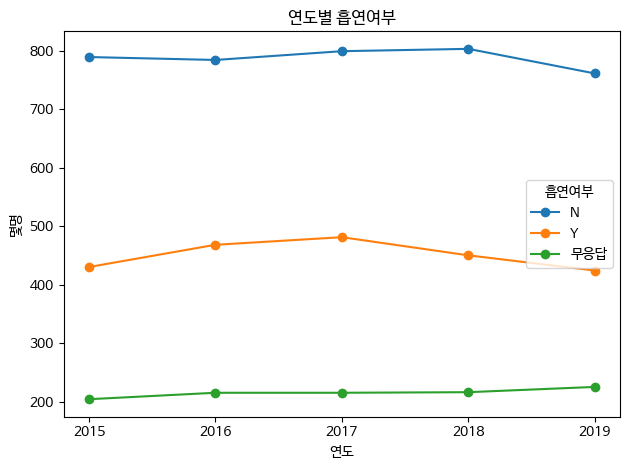

In [5]:
# 연도별 흡연여부 꺾은선 그래프로 표현
import matplotlib.pyplot as plt

stats_count_per_year = data1.groupby(['critYr', 'statsTrgtNm']).size()
stats_count_per_year = stats_count_per_year.unstack()

stats_count_per_year.plot(kind='line', marker='o')
plt.title('연도별 흡연여부')
plt.xlabel('연도')
plt.ylabel('몇명')
plt.legend(title='흡연여부')

plt.xticks(stats_count_per_year.index)
plt.tight_layout()
plt.show()

In [6]:
filtered_data = data1[data1['statsTrgtNm'] == 'Y']

stats_count_per_year_Y = filtered_data.groupby('critYr')['statsTrgtNm'].count()

print(stats_count_per_year_Y)

critYr
2015    430
2016    468
2017    481
2018    450
2019    424
Name: statsTrgtNm, dtype: int64


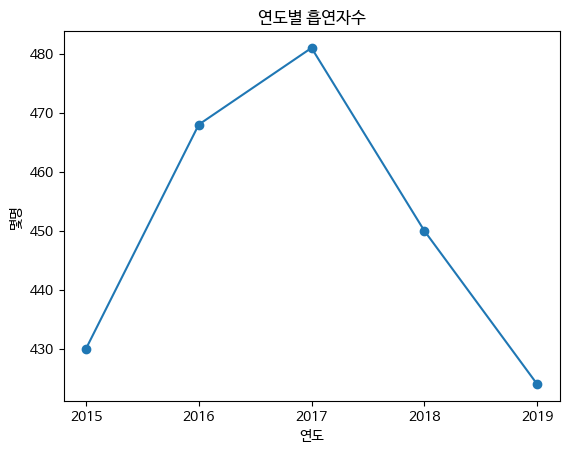

In [7]:
import matplotlib.pyplot as plt

plt.plot(stats_count_per_year_Y.index, stats_count_per_year_Y.values, marker='o')

plt.title('연도별 흡연자수')
plt.xlabel('연도')
plt.ylabel('몇명')

plt.xticks(stats_count_per_year_Y.index)
plt.show()

---

# **연도별 폐암 발생자수**

In [2]:
# 암 발생자수 csv 불러옴
import pandas as pd

file_path = '암발생자수.xlsx'
df = pd.read_excel(file_path, index_col=0)

lung_cancer = df.loc['폐암(C33-C34)', ['2015', '2016', '2017', '2018', '2019']]

# ','를 제거하여 숫자로 변환
lung_cancer = lung_cancer.str.replace(',', '').astype(int)

print(lung_cancer)

2015    24791
2016    26347
2017    27581
2018    29046
2019    30371
Name: 폐암(C33-C34), dtype: int64


In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,275 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

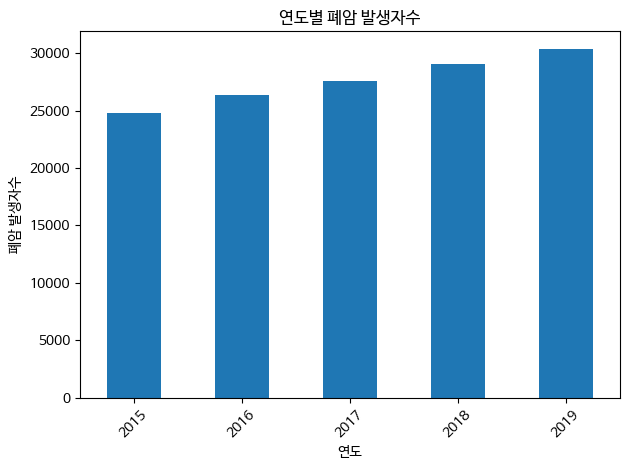

In [3]:
# 연도별 폐암 발생자수 막대그래프
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumBarunGothic'

plt.title('연도별 폐암 발생자수')
plt.xlabel('연도')
plt.ylabel('폐암 발생자수')

lung_cancer.plot(kind='bar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
# **막대그래프+꺾은선그래프**

In [8]:
merged_df = pd.DataFrame({'흡연자수': stats_count_per_year_Y.values, '폐암발생자수': lung_cancer.values}, index=stats_count_per_year_Y.index)

print(merged_df)

        흡연자수  폐암발생자수
critYr              
2015     430   24791
2016     468   26347
2017     481   27581
2018     450   29046
2019     424   30371


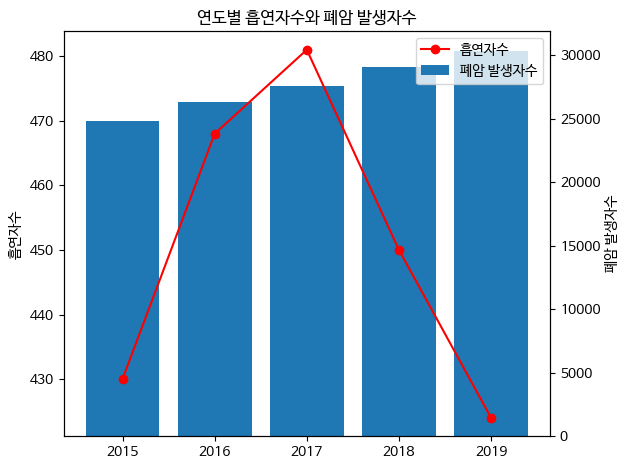

In [9]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# 꺾은선 그래프(흡연자수)
ax1.plot(merged_df.index, merged_df['흡연자수'], color='r', marker='o', label='흡연자수')
ax1.set_ylabel('흡연자수')
ax1.tick_params(axis='y')

# 막대 그래프(폐암 발생자수)
ax2 = ax1.twinx()
ax2.bar(merged_df.index, merged_df['폐암발생자수'], label='폐암 발생자수')
ax2.set_ylabel('폐암 발생자수')
ax2.tick_params(axis='y')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# 그래프 그리는 순서 지정
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

plt.title('연도별 흡연자수와 폐암 발생자수')
plt.xlabel('연도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# 정규화 함수
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

normalized_df = pd.DataFrame({'정규화된 흡연자수': min_max_normalize(merged_df['흡연자수']), '정규화된 폐암 발생자수': min_max_normalize(merged_df['폐암발생자수'])}, index=merged_df.index)

print(normalized_df)

        정규화된 흡연자수  정규화된 폐암 발생자수
critYr                         
2015     0.105263      0.000000
2016     0.771930      0.278853
2017     1.000000      0.500000
2018     0.456140      0.762545
2019     0.000000      1.000000


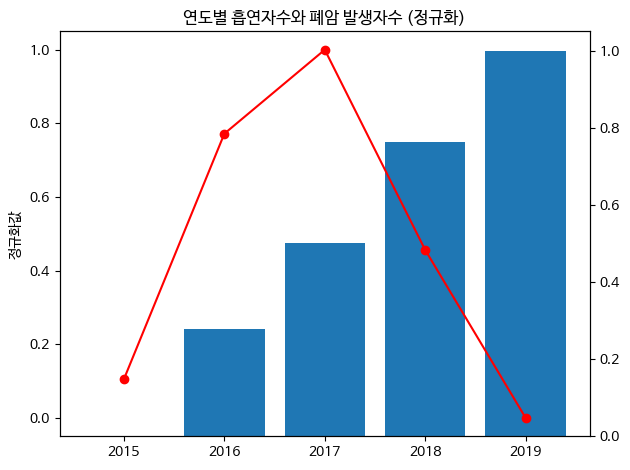

In [35]:
fig, ax1 = plt.subplots()

# 정규화된 꺾은선 그래프(흡연자수)
ax1.plot(normalized_df.index, normalized_df['정규화된 흡연자수'], color='r', marker='o', label='흡연자수 (정규화)')
ax1.set_ylabel('정규화값')

# 정규화된 막대 그래프(폐암 발생자수)
ax2 = ax1.twinx()
ax2.bar(normalized_df.index, normalized_df['정규화된 폐암 발생자수'], label='폐암 발생자수 (정규화)')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

plt.title('연도별 흡연자수와 폐암 발생자수 (정규화)')
plt.xlabel('연도')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()